<center><h1> ADMN5005 Financial Analytics </h1>
<h2> Assignment 1: Corporate Bankruptcy Prediction

<center><b> Group Members: </b> Eyas Abu Elhouf, Katrina Ong, Melvin Cheriyan, Pranav Gujar, Bista Bijo, Praveen Kumar <br><br>
<b>Code Written by:</b> Eyas Abu Elhouf, Katrina Ong


--------------

## Table of Contents

1. Import Packages
2. Load and Explore the Dataset
3. Preliminary Data Cleaning
4. Data Pre-processing
5. Logistic Regression
6. Random Forest
7. Naive Bayes 
8. Voting Classifier
9. Model Selection

--------------

## 1) Import Packages

### 1.1) Standard Libaries

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 2)


%matplotlib inline

### 1.2) Additional Libraries for Modelling

In [2]:
#KNN Imputer
from sklearn.impute import KNNImputer

In [3]:
#Winsorization
from scipy.stats.mstats import winsorize

In [4]:
#Imbalanced learning library
from imblearn.datasets import fetch_datasets
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import (
    SMOTE,
    BorderlineSMOTE,
    SVMSMOTE,
)

from imblearn.combine import SMOTEENN, SMOTETomek

In [5]:
#Scaler
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    RobustScaler
)

In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [7]:
#Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [8]:
#Classification Metrics
from sklearn import metrics

In [9]:
#Grid Search
from sklearn.model_selection import GridSearchCV

----------

## 2) Load and Explore the Dataset

### 2.1) Load the Dataset

In [10]:
filepath = "C:/Users/Katrina Ong/Documents/Academic/SLC/03 Fall 2022/ADMN5006 Financial Analytics/Group Assignment/Bankruptcy_data_Final (2).xlsx"
df = pd.read_excel(filepath)

In [11]:
#Check the dataset
df.head(3)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.5800,0.3600,0.1800,0.1300,1.3300,1.7700,0.0700,0.1500,2.2200,nan,nan,nan,0
1,1.4100,0.3600,0.1900,0.1200,1.3100,1.5900,0.0700,0.1300,2.4100,0.1263,0.0143,0.0402,0
2,0.3100,0.3200,0.1300,0.0800,1.0300,1.5500,0.0500,0.0400,2.5600,0.3681,0.3279,0.5665,0


In [12]:
#Check the number of observations and features
df.shape

(92872, 13)

In [13]:
#Create Copy of Original Dataset
df_orig = df.copy()

### 2.2) Explore Data Types

In [14]:
#See Columns and Data Types
df.info() #all numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


### 2.3) Explore Statistics and Distribution

In [15]:
#Check statistics - to see scale of data
df_stats = df.describe()
df_stats

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.0000,92625.0000,92625.0000,92625.0000,92846.0000,92625.0000,87315.0000,92864.0000,92815.0000,86171.0000,86171.0000,85862.0000,92872.0000
mean,-14.4614,-2.6312,-29.5373,-1.2229,1.3453,1.0536,-7.9155,-2.1124,358.5063,1.2941,1.9001,0.3433,0.0060
std,2195.4673,121.6109,677.2307,35.8856,253.0381,2.1159,214.4601,352.5969,26063.6380,73.7695,177.6326,14.0742,0.0773
min,-384000.0000,-25968.5200,-79682.0000,-5093.0000,-7811.0000,-31.5900,-30175.7000,-88875.1400,-3151500.0000,-1.0000,-27.4310,-1.0000,0.0000
25%,-0.1400,0.0200,-0.6400,-0.0600,0.0000,0.3900,-0.0300,-0.0800,11.2000,-0.0526,-0.0335,-0.0481,0.0000
50%,0.3300,0.1900,0.0700,0.0600,0.2800,0.8300,0.0600,0.0300,58.2800,0.0518,0.0597,0.0172,0.0000
75%,1.5300,0.4000,0.3100,0.1100,0.8200,1.3900,0.1400,0.0700,240.1400,0.1921,0.2042,0.1309,0.0000
max,55339.0000,1.0000,140.5800,1102.0000,75970.3800,276.3800,394.4700,39500.0000,3455419.3300,14231.0000,39850.0000,2699.0000,1.0000


### 2.4) Check Target Variable

In [16]:
#Identify and check the value counts/classes of the target variable
#1 - Bankrupt
#0 - Not Bankrupt

df["BK"].value_counts() 

0    92314
1      558
Name: BK, dtype: int64

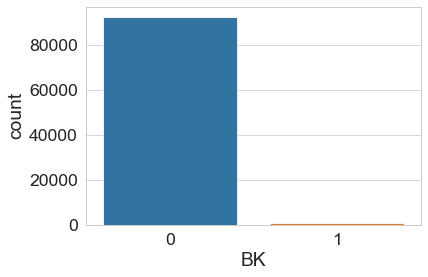

In [17]:
sns.countplot(data = df, x = "BK"); #highly imbalanced

### 2.5) Check Features' Distributions

In [18]:
#create dataframe of independent variables for data exploration
df_independent = df.drop(["BK"], axis=1)

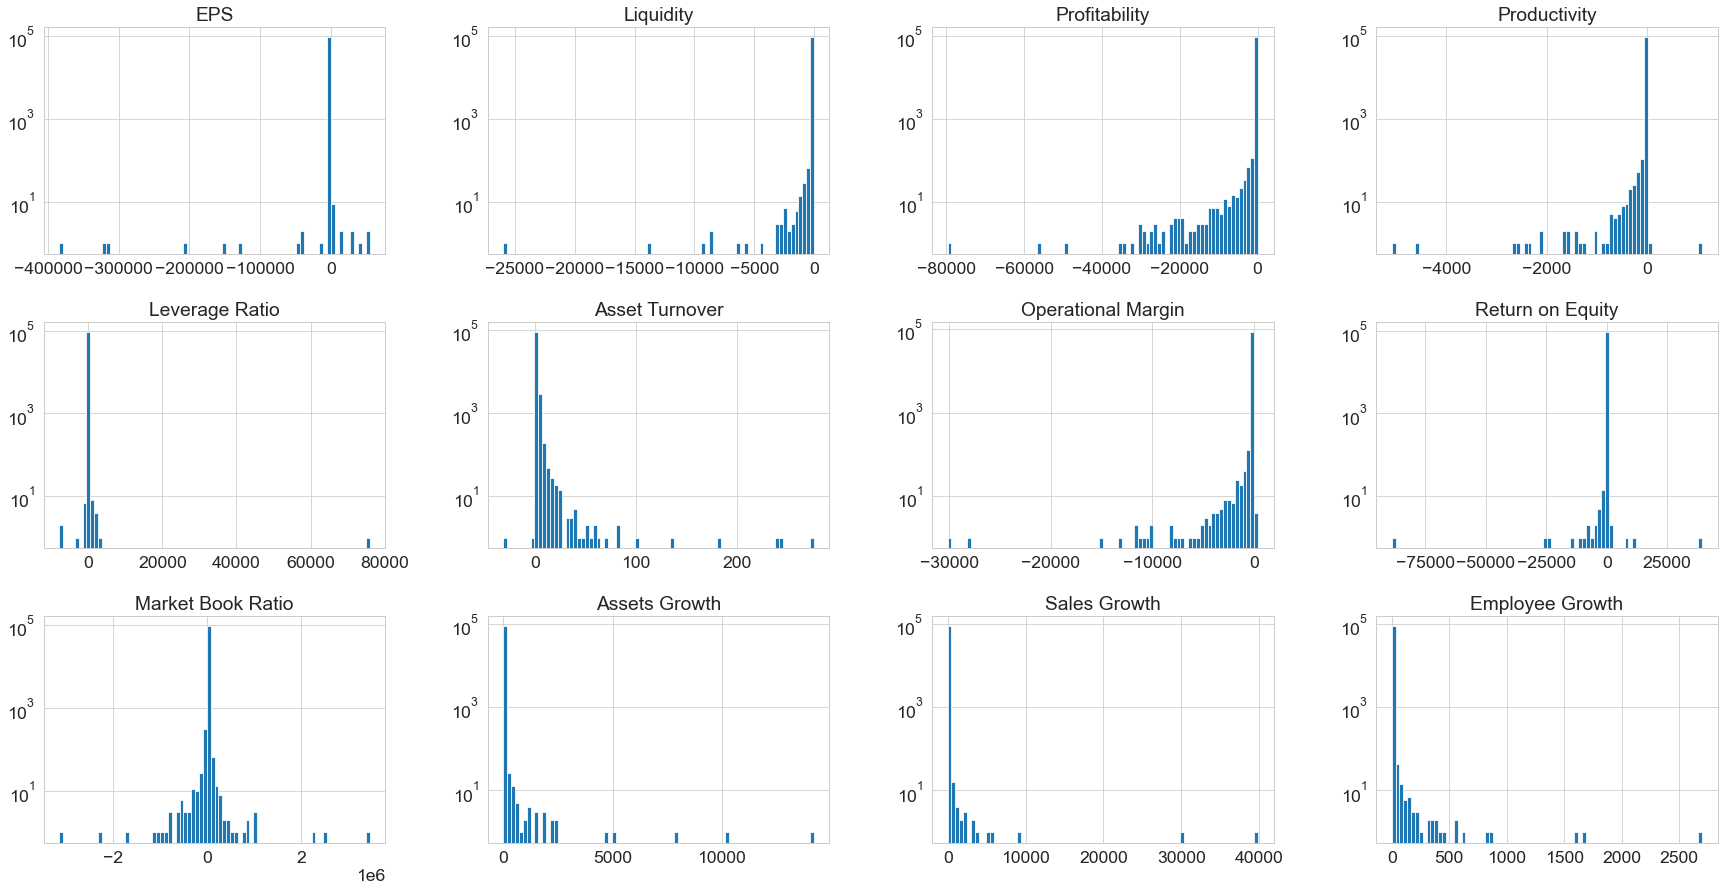

In [19]:
#displaying the distribution of each feature on a logarithmic scale
df.hist(column = df_independent.columns, bins = 80, figsize = (30,15), layout = (3,4), log = True);

### 2.5) Check Features' Distribution vs. Target

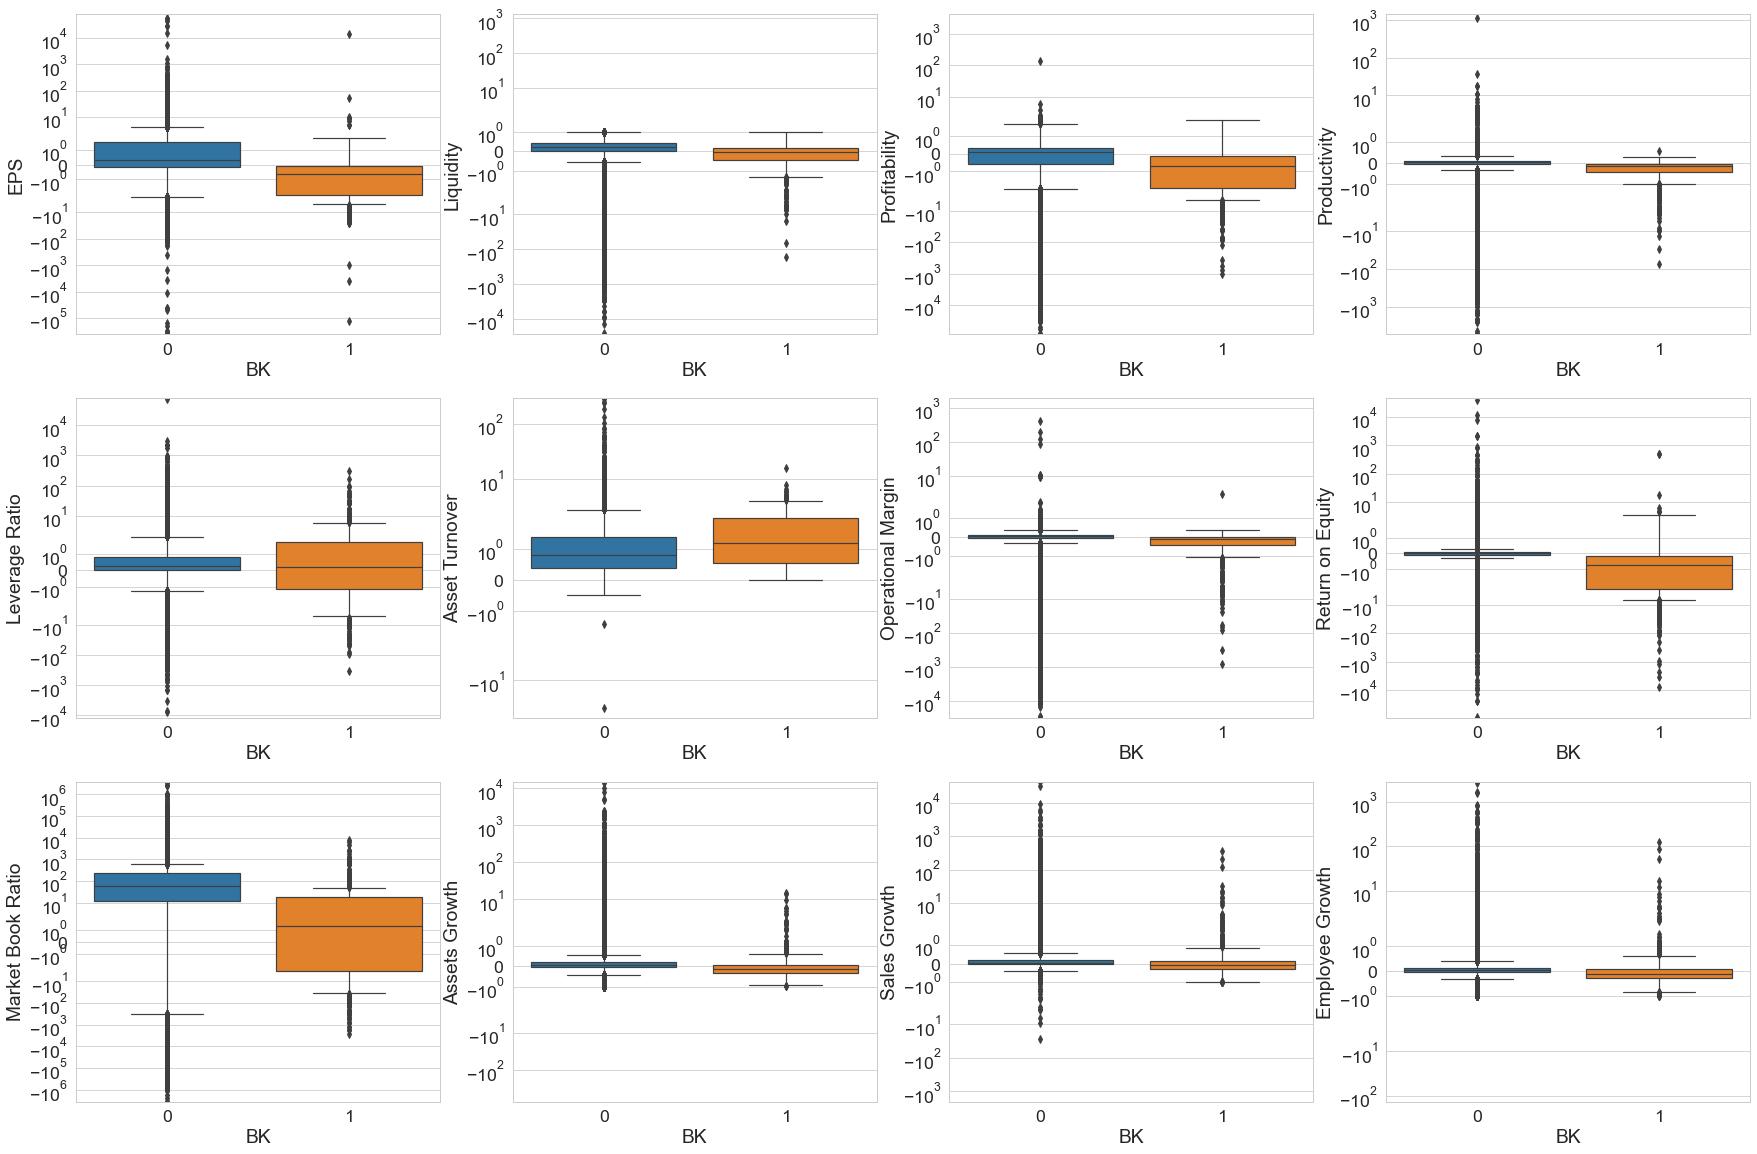

In [20]:
num_cols = df_independent.columns.tolist()
fig,axes = plt.subplots(3,4,figsize=(30,20))
for idx,num_col in enumerate(num_cols):
    row,col = idx//4,idx%4
    g = sns.boxplot(y=num_col,data=df,x='BK',ax=axes[row,col])
    g.set_yscale('symlog');

<div class="alert alert-info">
<b> Observation: </b> There seems to be several extreme values/ outliers.

### 2.3) Check Correlation of Features

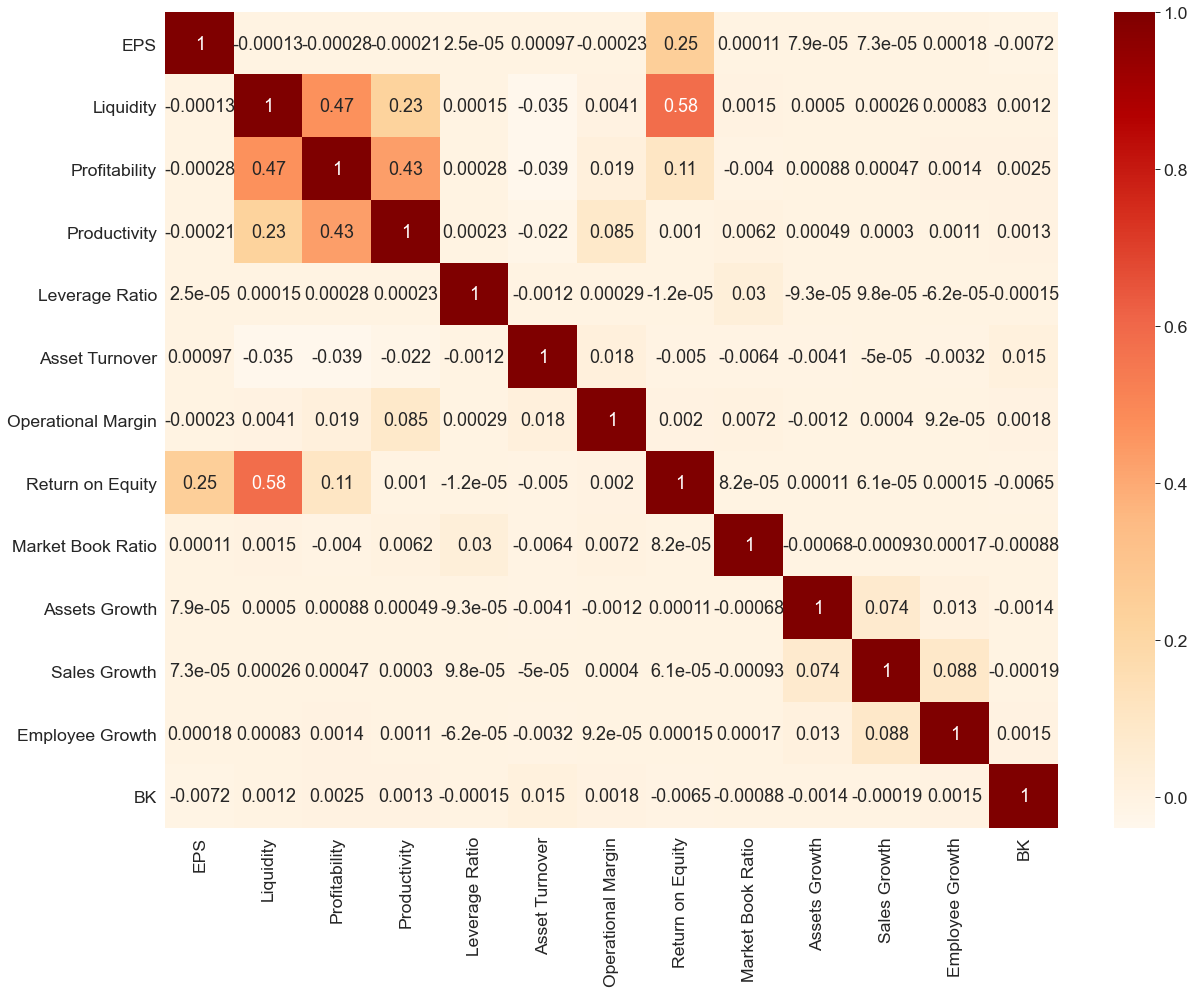

In [21]:
#Create Correlation Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = True, annot_kws={"fontsize":18}, cmap='OrRd');

----------

## 3) Preliminary Data Cleaning

### 3.1) Check for Duplicates

In [22]:
#Check for duplicates in samples
df.duplicated().value_counts()

False    92845
True        27
dtype: int64

<b> Note: </b> Check with Maverick if duplicates are expected

In [23]:
#Drop Duplicates
df.drop_duplicates(inplace=True)

In [24]:
#Recheck Dataframe for duplicates
df.duplicated().value_counts()

False    92845
dtype: int64

In [25]:
#Recheck target
#1 - Bankrupt
#0 - Not Bankrupt

df["BK"].value_counts() #The bankruptcy cases remain intact

0    92287
1      558
Name: BK, dtype: int64

### 3.2) Checking Outliers

#### 3.2.1) Checking Effect of Trimming Outliers on the Dataset

In [26]:
#defining a function to list-wise deletion of records with at least 1 outlier based on a list of columns
def remove_outliers(df,cols,distance = 1.5):
    # Calculate quantiles and IQR
    Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    # Return a boolean array of the rows with (any) non-outlier column values
    condition = ~((df[cols] < (Q1 - distance * IQR)) | (df[cols] > (Q3 + distance * IQR))).any(axis=1)

    # Filter our dataframe based on condition
    filtered_df = df[condition]
    
    return filtered_df

In [27]:
#Creating a list of indepedent variables
independent_variables = df.columns[:-1].tolist()

In [28]:
#Creating a new dataframe without outliers in any record
df_noOutliers = remove_outliers(df,independent_variables,3)
df_noOutliers.head(3)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.5800,0.3600,0.1800,0.1300,1.3300,1.7700,0.0700,0.1500,2.2200,nan,nan,nan,0
1,1.4100,0.3600,0.1900,0.1200,1.3100,1.5900,0.0700,0.1300,2.4100,0.1263,0.0143,0.0402,0
2,0.3100,0.3200,0.1300,0.0800,1.0300,1.5500,0.0500,0.0400,2.5600,0.3681,0.3279,0.5665,0


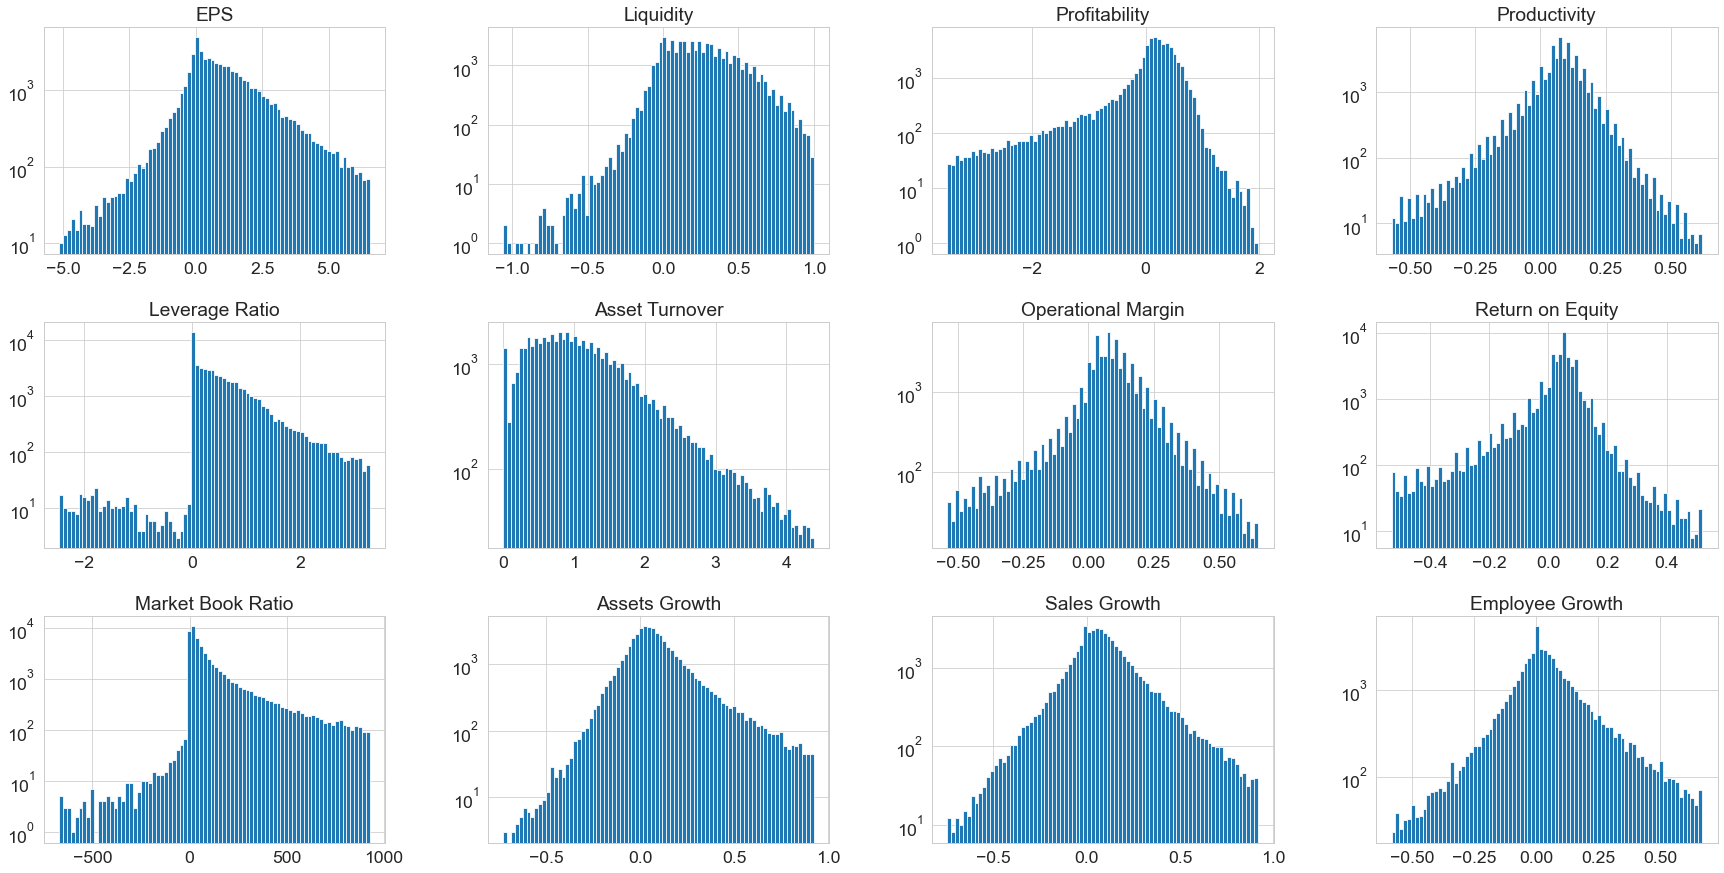

In [29]:
#displaying the distribution of each feature on a logarithmic scale
df_noOutliers.hist(column = df_independent.columns, bins = 80, figsize = (30,15), layout = (3,4), log = True);

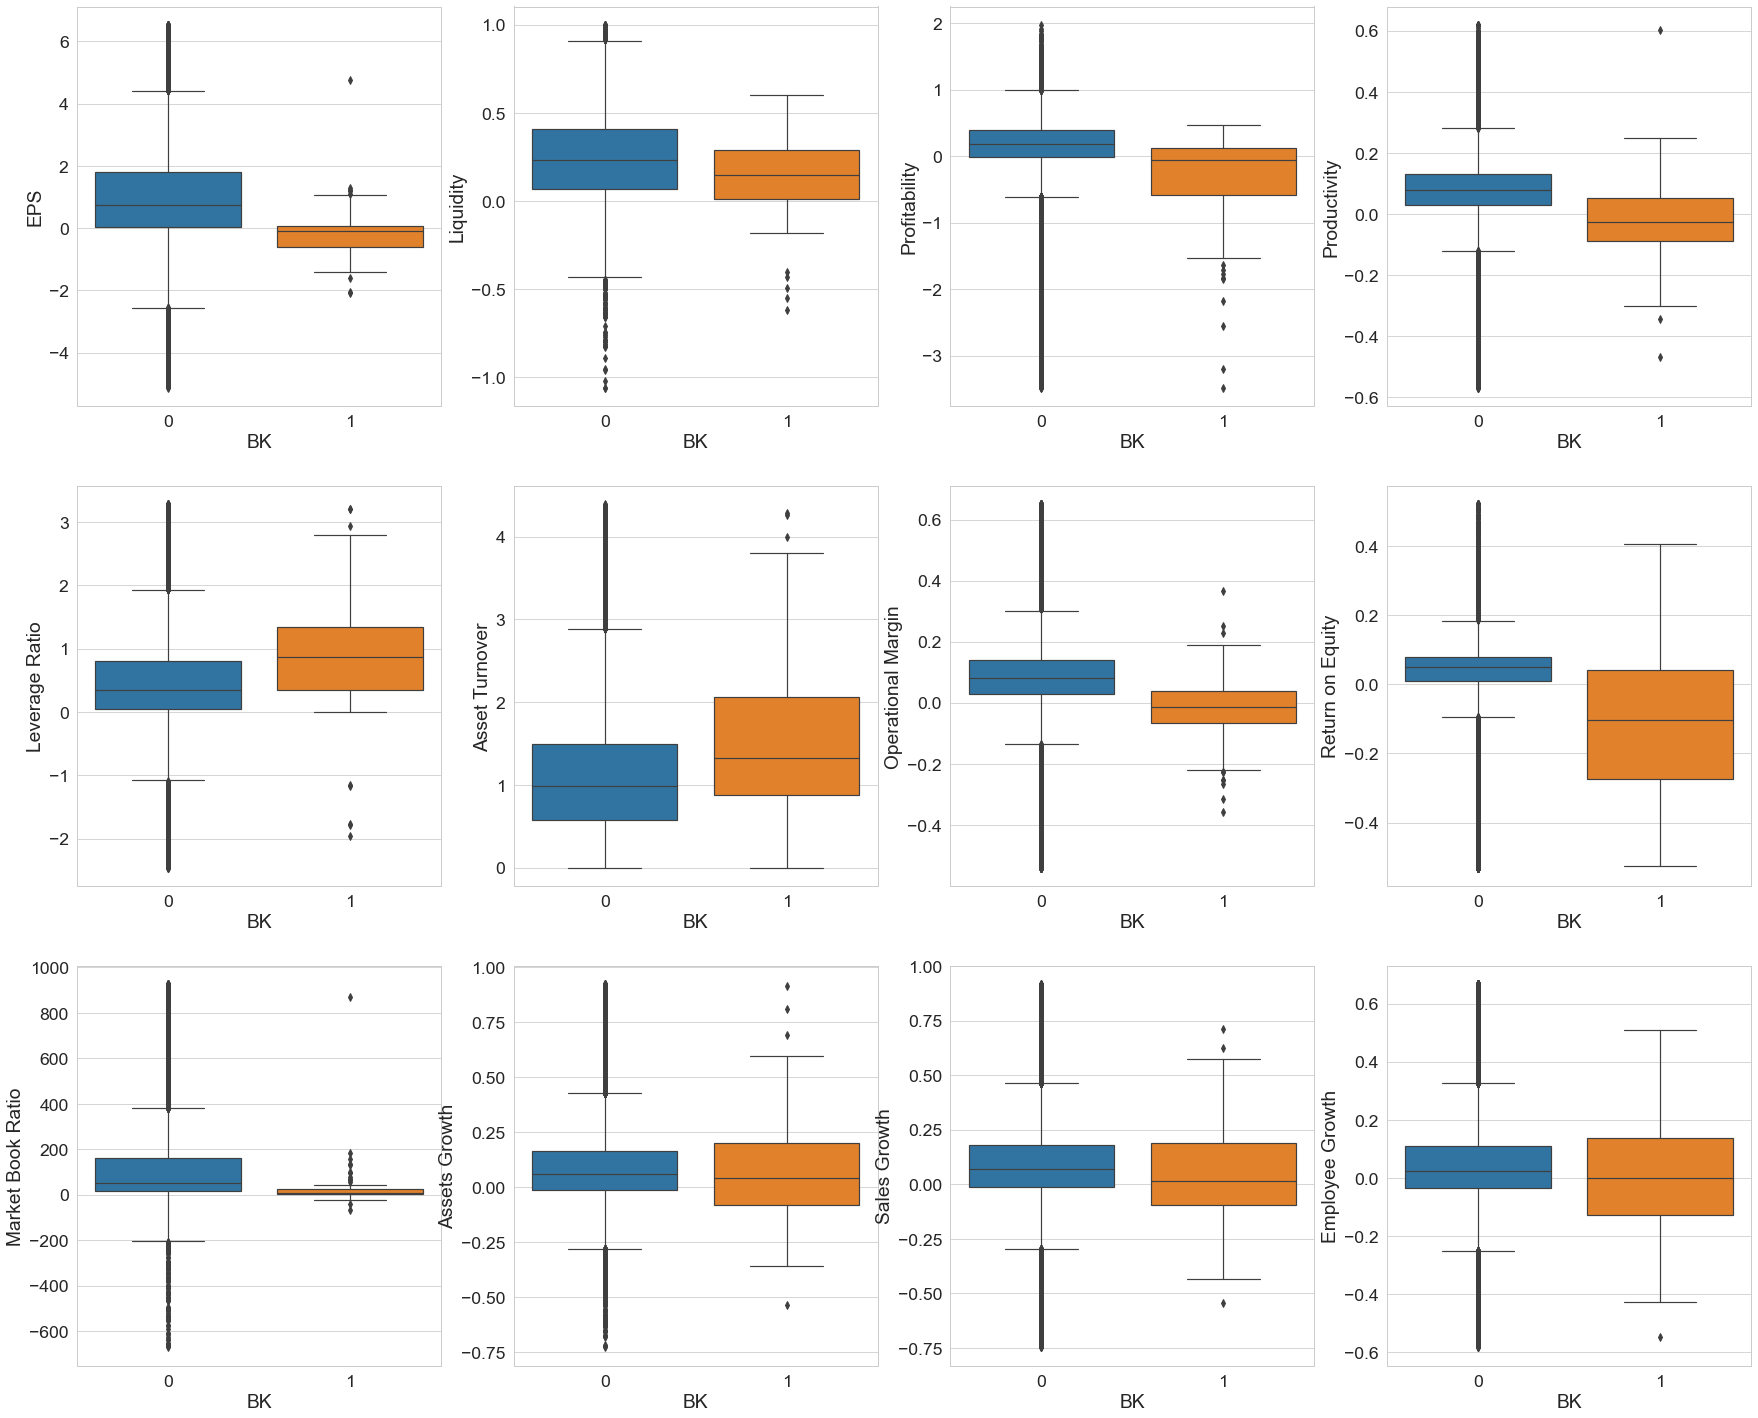

In [30]:
num_cols = df_independent.columns.tolist()
fig,axes = plt.subplots(3,4,figsize=(30,25))
for idx,num_col in enumerate(num_cols):
    row,col = idx//4,idx%4
    g = sns.boxplot(y=num_col,data=df_noOutliers,x='BK',ax=axes[row,col]);

In [31]:
df_noOutliers.shape

(54239, 13)

In [32]:
df_noOutliers["BK"].value_counts() 

0    54157
1       82
Name: BK, dtype: int64

#### 3.2.1) Checking Effect of Winsorizing Outliers on Dataset

In [33]:
#Creating a Function to Winsorize each Column of a Dataframe 
def winsorize_df(df,lower_limit, upper_limit, columns = df.columns):
    df_winsor = df.copy()
    for col in columns:
        df_winsor[col] = winsorize(df[col], limits = [lower_limit, upper_limit], inplace = False)
    return df_winsor

In [34]:
#Testing Winsorize Function
test_winsor = winsorize(df['EPS'],limits = [0.01,0.01],inplace = False)

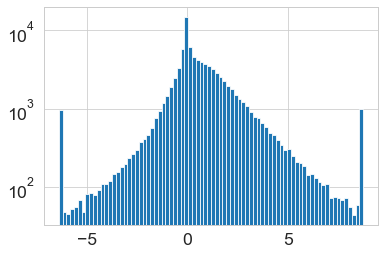

In [35]:
#plt.subplots(figsize = (10,10))
plt.hist(test_winsor,bins = 80,log = True);

In [36]:
df_winsorized = winsorize_df(df,0.05,0.05,independent_variables)

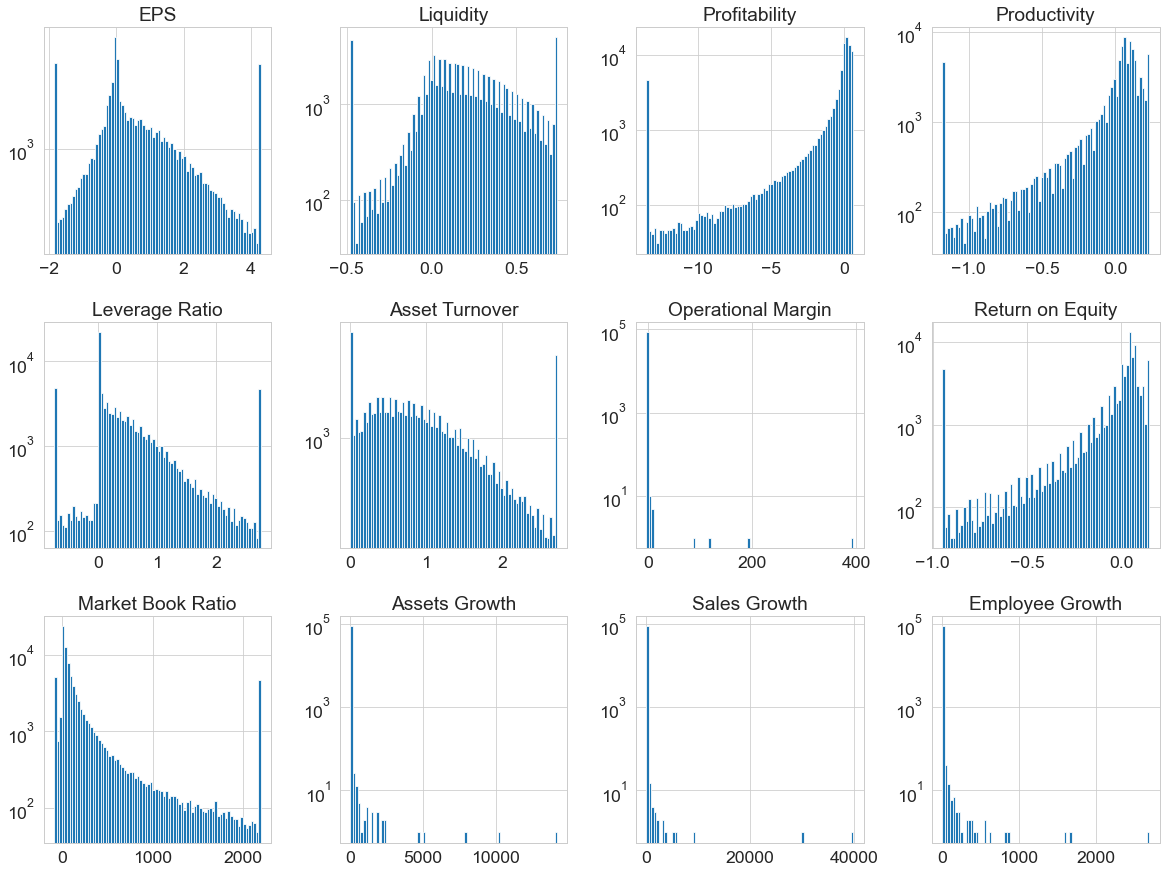

In [37]:
df_winsorized.hist(column = df_independent.columns, bins = 80, figsize = (20,15), layout = (3,4), log = True);

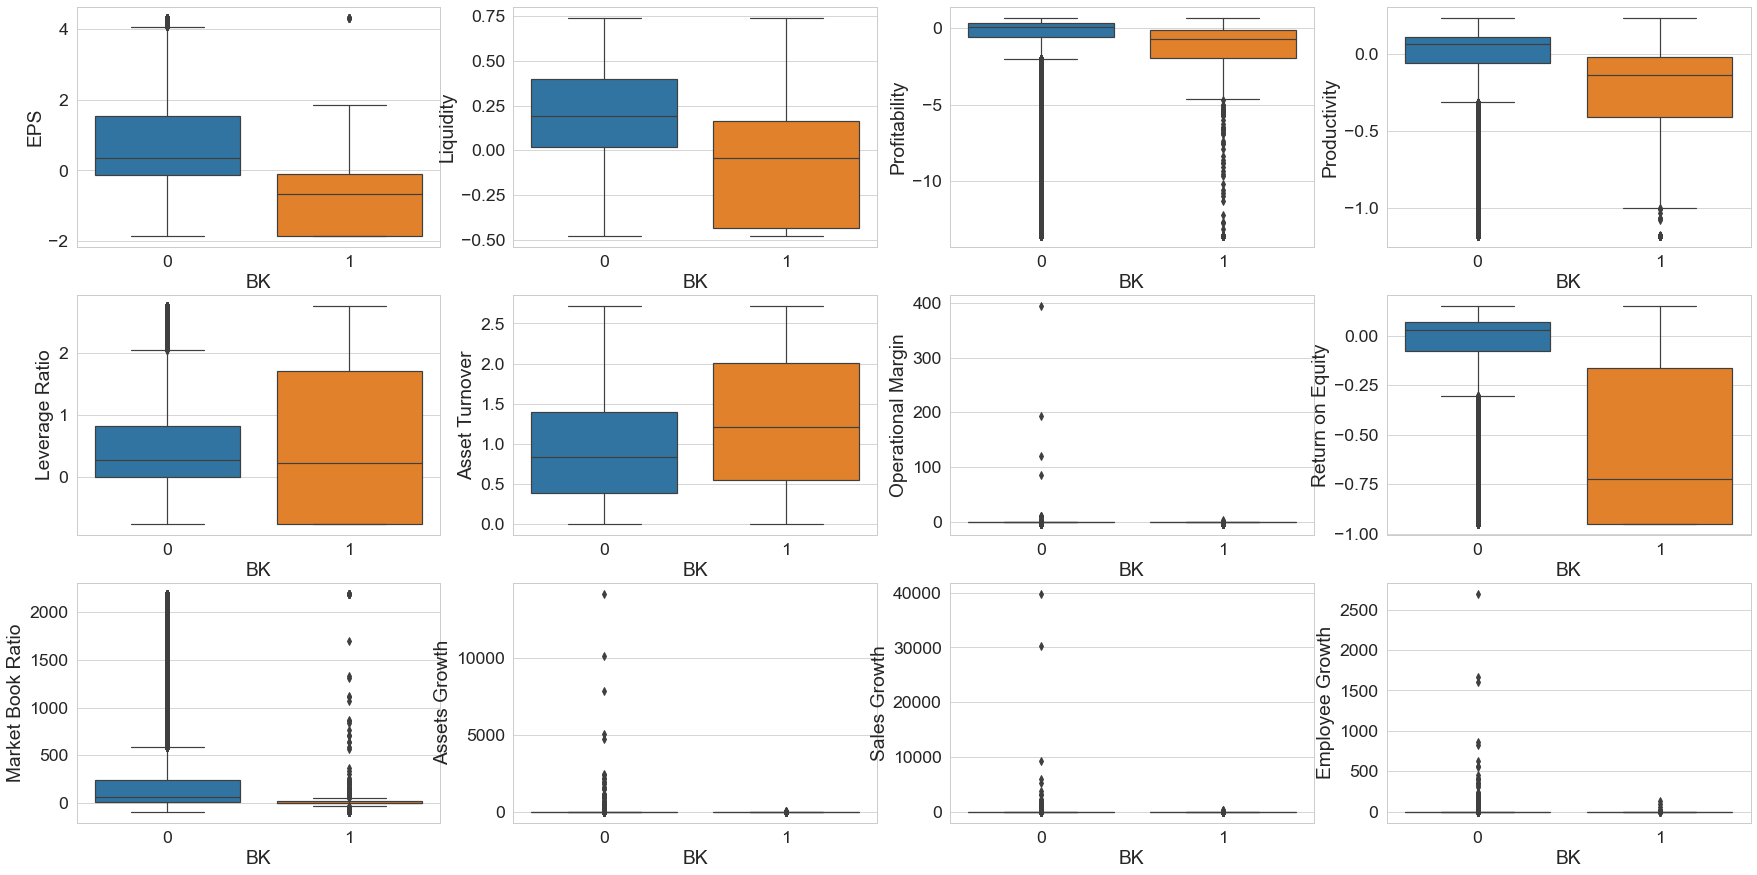

In [38]:
num_cols = df_independent.columns.tolist()
fig,axes = plt.subplots(3,4,figsize=(30,15))
for idx,num_col in enumerate(num_cols):
    row,col = idx//4,idx%4
    g = sns.boxplot(y=num_col,data=df_winsorized,x='BK',ax=axes[row,col]);

In [39]:
df.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92840.0000,92598.0000,92598.0000,92598.0000,92819.0000,92598.0000,87288.0000,92837.0000,92788.0000,86152.0000,86152.0000,85843.0000,92845.0000
mean,-14.4664,-2.6320,-29.5459,-1.2233,1.3454,1.0538,-7.9180,-2.1130,358.5937,1.2943,1.9005,0.3434,0.0060
std,2195.7865,121.6286,677.3292,35.8908,253.0749,2.1162,214.4932,352.6482,26067.4293,73.7777,177.6522,14.0757,0.0773
min,-384000.0000,-25968.5200,-79682.0000,-5093.0000,-7811.0000,-31.5900,-30175.7000,-88875.1400,-3151500.0000,-1.0000,-27.4310,-1.0000,0.0000
25%,-0.1400,0.0200,-0.6400,-0.0600,0.0000,0.3900,-0.0300,-0.0800,11.2000,-0.0526,-0.0335,-0.0481,0.0000
50%,0.3300,0.1900,0.0700,0.0600,0.2800,0.8300,0.0600,0.0300,58.3050,0.0519,0.0597,0.0172,0.0000
75%,1.5300,0.4000,0.3100,0.1100,0.8200,1.3900,0.1400,0.0700,240.1700,0.1921,0.2043,0.1310,0.0000
max,55339.0000,1.0000,140.5800,1102.0000,75970.3800,276.3800,394.4700,39500.0000,3455419.3300,14231.0000,39850.0000,2699.0000,1.0000


In [40]:
df_winsorized.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92845.0000,92845.0000,92845.0000,92845.0000,92845.0000,92845.0000,87288.0000,92845.0000,92845.0000,86152.0000,86152.0000,85843.0000,92845.0000
mean,0.7245,0.2035,-1.2086,-0.0604,0.5254,0.9684,-0.2260,-0.0716,287.0308,1.3063,1.9166,0.3561,0.0060
std,1.5146,0.2921,3.4357,0.3391,0.8036,0.7418,1.8452,0.2669,560.1953,73.7774,177.6520,14.0749,0.0773
min,-1.8500,-0.4800,-13.5900,-1.1800,-0.7500,0.0000,-3.7600,-0.9500,-92.4000,-0.3701,-0.3944,-0.3214,0.0000
25%,-0.1400,0.0200,-0.6300,-0.0600,0.0000,0.3900,-0.0300,-0.0800,11.2100,-0.0526,-0.0335,-0.0481,0.0000
50%,0.3300,0.1900,0.0700,0.0600,0.2800,0.8300,0.0600,0.0300,58.4100,0.0519,0.0597,0.0172,0.0000
75%,1.5300,0.4000,0.3100,0.1100,0.8200,1.3900,0.1400,0.0700,241.0300,0.1921,0.2043,0.1310,0.0000
max,4.3000,0.7400,0.6500,0.2300,2.7600,2.7200,394.4700,0.1500,2196.7000,14231.0000,39850.0000,2699.0000,1.0000


In [41]:
df_winsorized.shape

(92845, 13)

<div class="alert alert-danger">
<b> Note: </b>
    <li> Removing all samples with extreme outliers results in significant data loss. </li>
    <li> Did not remove outliers in working dataframe. </li>
    <li> Will treat it after train-test split </li>
</div>

### 3.3) Check for Missing Values

#### Notes on Missing Value Types
<table>
    <tr>
        <th style = "text-align:center"> Type </th>
        <th style = "text-align:center"> Description </th>
        <th style = "text-align:center"> Recommended Approach </th>
    </tr>
    <tr>
        <td style = "text-align:left"> Missing Completely At Random (MCAR) </td>
        <td style = "text-align:left"> no association with the data you have observed or not observed </td>
        <td style = "text-align:left"> 
            <li> Imputation is advisable
            <li> Do not delete unless there is less than 5% data loss
        </td>
    </tr>
    <tr>
        <td style = "text-align:left"> Missing At Random (MAR) </td>
        <td style = "text-align:left"> depends on data observed, but not data unobserved </td>
        <td style = "text-align:left">
            <li> Impute
            <li> Deleting observations is not appropriate, and will lead to bias
        </td>
    </tr>
        <tr>
        <td style = "text-align:left"> Missing Not At Random (MNAR) </td>
        <td style = "text-align:left"> related to an unobserved value relevant to the assessment of interest </td>
        <td style = "text-align:left">
            <li> data will be biased from deletion and imputation
            <li> inference can be limited, proceed with caution
        </td>
    </tr>
</table>

#### 3.3.1) Check on Overall Dataset

In [42]:
#defining a function to check on missing data
def checkmissing_df(df,index_name = ""):
    
    count_missing = df.isnull().sum()
    percent_missing = count_missing * 100 / len(df)
    missing_value_df = pd.DataFrame({'counts_missing': count_missing,'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
    missing_value_df.index.name = index_name
    
    return missing_value_df

In [43]:
#checking on counts and percentage of missing data
missingsamples_df = checkmissing_df(df,index_name = "Columns_All")
missingsamples_df

,counts_missing,percent_missing
Columns_All,,
Employee Growth,7002,7.5416
Assets Growth,6693,7.2088
Sales Growth,6693,7.2088
Operational Margin,5557,5.9852
Liquidity,247,0.2660
Profitability,247,0.2660
Productivity,247,0.2660
Asset Turnover,247,0.2660
Market Book Ratio,57,0.0614


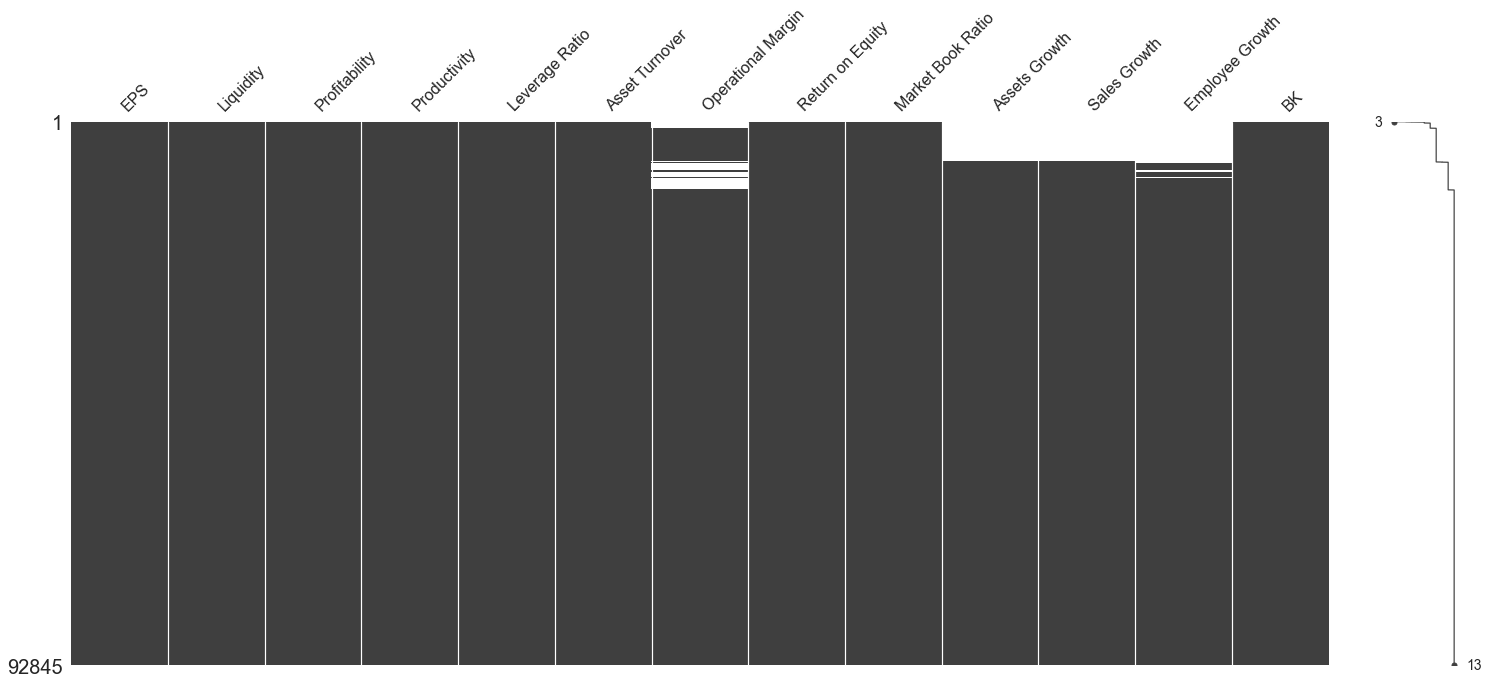

In [44]:
#visualizing if there are blocks of data that are missing together
msno.matrix(df,sort = "ascending");

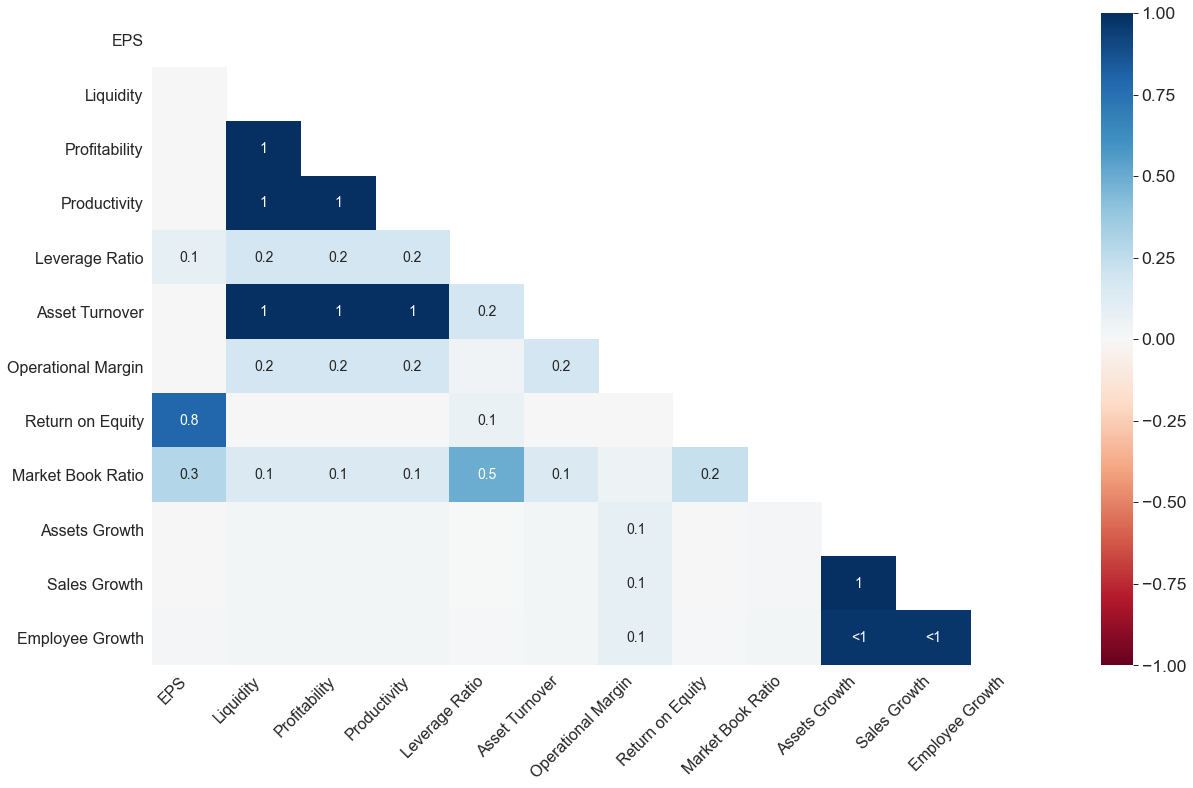

In [45]:
#visualizing correlations of missingness between columns
msno.heatmap(df);

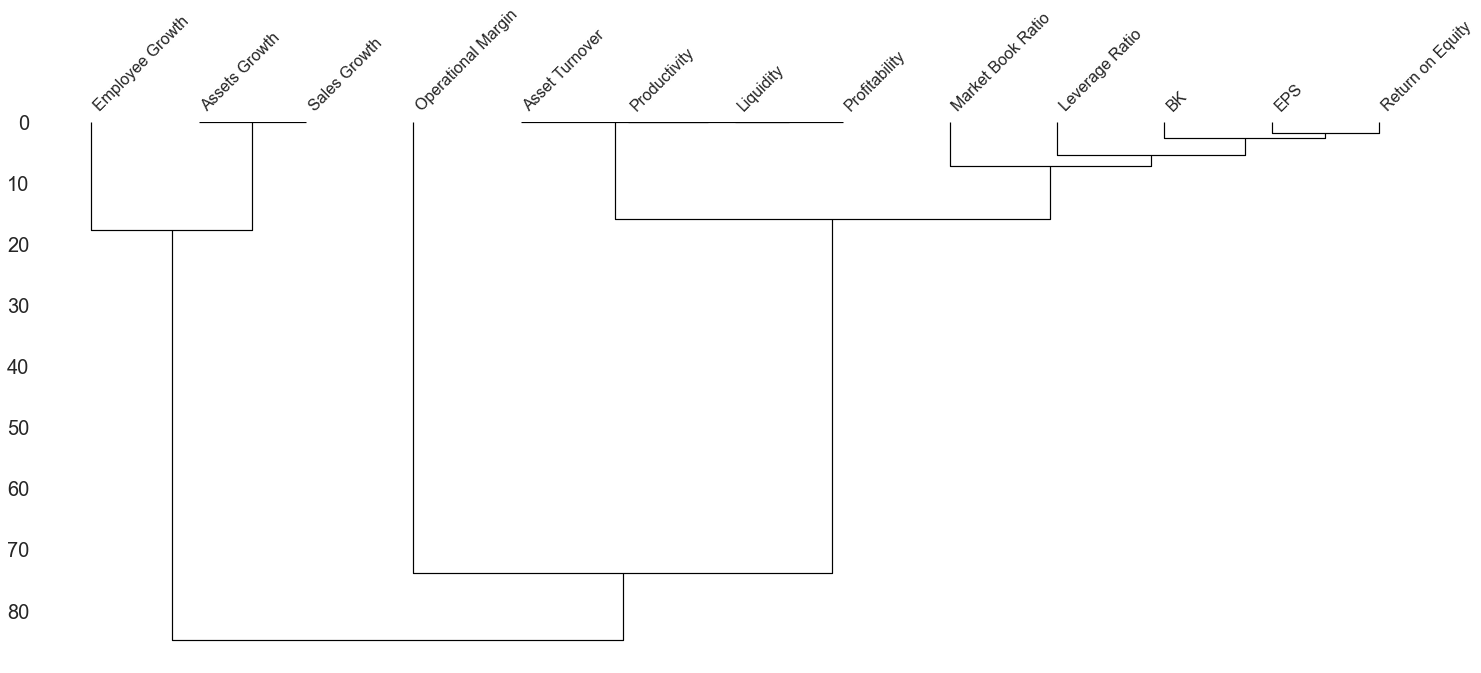

In [46]:
#Grouping columns which are missing together
msno.dendrogram(df);

<div class="alert alert-info">
<h4>Observations:</h4>
<br>   
<li> None of the features need to be dropped since percentage of missing records per feature are all below 20%
<li> High correlation between Asset Turnover, Profitability, Productivity, and Liquitidy; 100% overlap in records w/ missing data in these features
<li> High correlation between Assets Growth, Sales Growth; 100% overlap in records w/ missing data in these features, These two are also highly correlated with Employee growth
<li> High correlation between ROE and EPS
<li> Somewhat high correlation between Leverage Ratio and Market Book Ratio

#### 3.3.2) Check on Bankruptcy (Rare Events) subset

In [47]:
df_bankrupt = df[(df['BK']==1)]

In [48]:
df_bankrupt.shape

(558, 13)

In [49]:
#checking count and percentage of missing data
checkmissing_df(df_bankrupt, "Columns_Bankrupt")

,counts_missing,percent_missing
Columns_Bankrupt,,
Employee Growth,72,12.9032
Operational Margin,17,3.0466
Market Book Ratio,9,1.6129
EPS,4,0.7168
Return on Equity,4,0.7168
Leverage Ratio,1,0.1792
Liquidity,0,0.0000
Profitability,0,0.0000
Productivity,0,0.0000


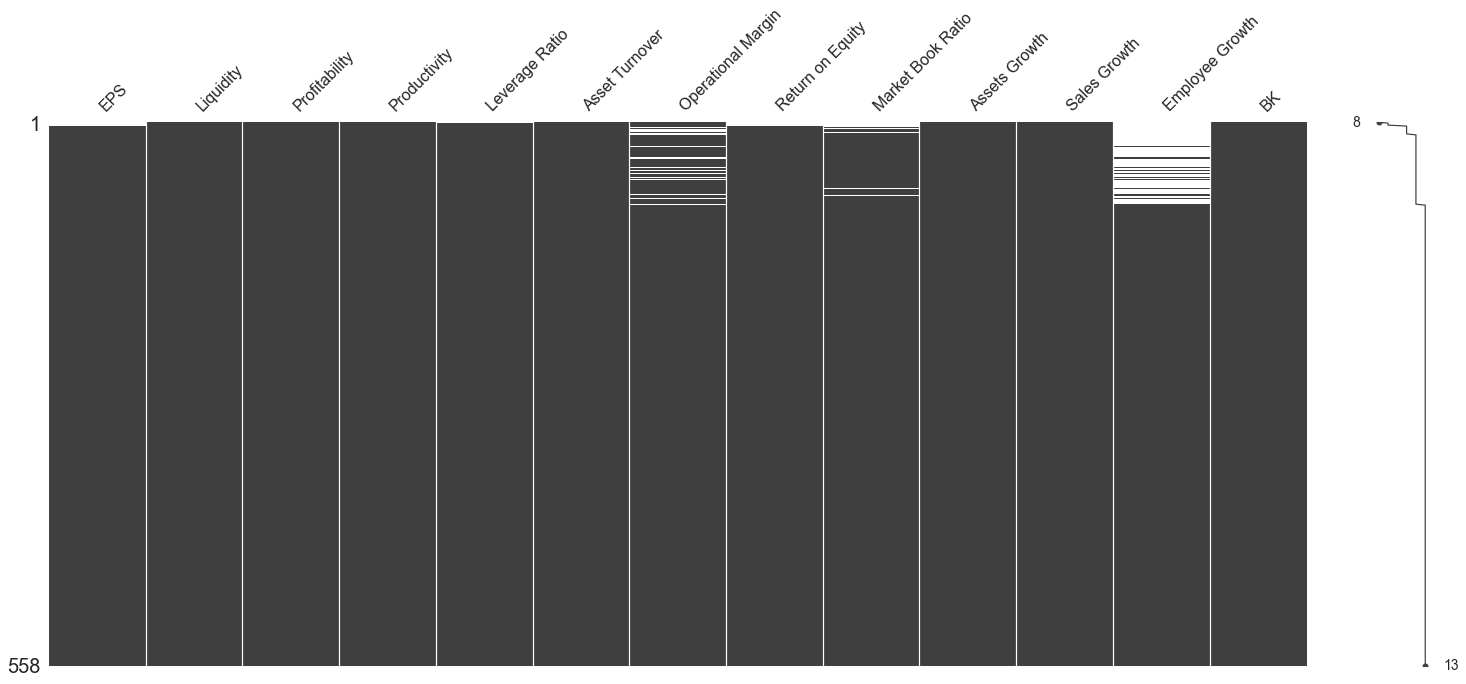

In [50]:
#visualizing if there are blocks of data that are missing together
msno.matrix(df_bankrupt,sort = "ascending");

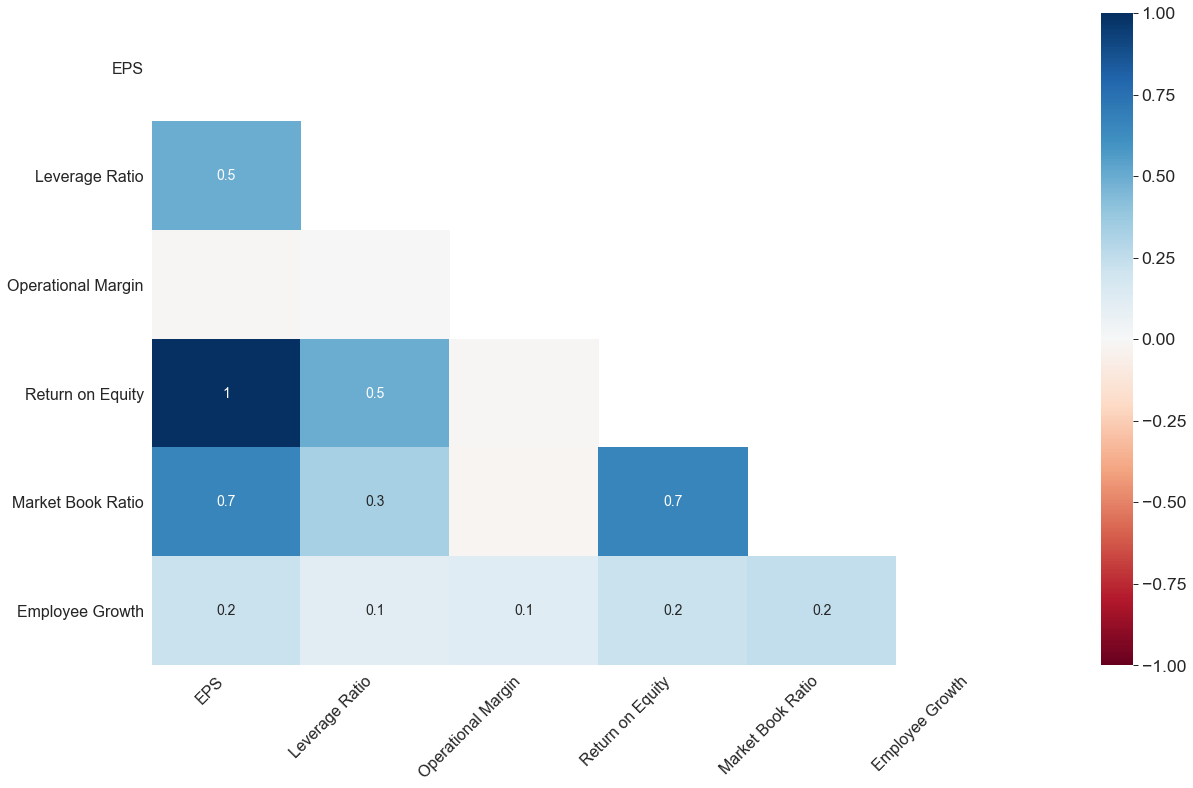

In [51]:
#visualizing correlations of missingness between features
msno.heatmap(df_bankrupt);

<div class="alert alert-info">
    <h4> Observations among bankrupt samples </h4>
<br>
<li> Samples with missing data in ROE are also missing EPS (100% overlap)
<li> High correlation between EPS and Market Book Ratio
<li> High correlation between ROE and Market Book Ratio

<div class="alert alert-danger">
<b> Note: </b> Missing values and outliers will be treated after the train-test split
</div>

--------------

## 4) Data Pre-processing

### 4.1) Train-Test Split

In [52]:
#Separate the Features and the Target Variable
X = df.drop('BK',axis=1)
y = df['BK']

In [53]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
#Check dimensions of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69633, 12), (23212, 12), (69633,), (23212,))

### 4.2) Imputing Missing Values

In [55]:
#Instantiate the Algorithm
imputer = KNNImputer(
    n_neighbors=5, 
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False,
)

In [56]:
#Fit the imputer to the training data
imputer.fit(X_train)

KNNImputer(weights='distance')

In [57]:
#Fill in Missing Values in the Training and Test Data
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [58]:
#Create Dataframe for complete values
train_t = pd.DataFrame(train_t, columns=X_train.columns)
test_t = pd.DataFrame(test_t, columns=X_test.columns)

In [59]:
train_t.head(3)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,-0.0300,0.9800,-0.1300,-0.1000,0.0000,0.0000,-20.0132,-0.0200,103.4900,1913.0000,0.0000,0.0000
1,-0.0100,-7.6600,-36.9600,-2.9200,-0.3800,0.0000,-27.6601,-0.0800,-263.9300,3.0360,-1.0000,0.0000
2,-0.4300,0.3100,-0.1700,-0.0900,0.0100,0.6400,-0.1400,-0.1700,37.0200,-0.0179,-0.0727,0.0034


In [60]:
test_t.head(3)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.2400,0.0300,0.1500,0.0600,0.5600,0.6600,0.0900,0.0800,49.8800,0.4120,0.5725,-0.0814
1,0.6700,0.1500,0.1100,0.3300,0.0000,0.7600,0.4400,0.1800,28.7700,3.7753,79.5067,0.3333
2,4.8000,-0.0200,0.3800,0.0800,0.6600,2.4600,0.0300,0.1300,67.8300,0.0923,0.0522,-0.4571


### 4.3) Treating Outliers

<b> Options for Treating Outliers: </b>
1. Trimming - removing outliers from the dataset

2. Imputation - substituting outliers using mean, median, or mode

3. Flooring & Capping - replacing outliers with upper and lower boundaries/ control limits for outliers

4. Winsorization - Any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself

<b> Method Used: </b> Winsorization


In [61]:
#Defining a function to find the upper and lower boundaries of outliers in a certain variable
def find_winsorboundaries(df, variable, lower_limit, upper_limit):

    lower_boundary = df[variable].quantile(lower_limit)
    upper_boundary = df[variable].quantile(1-upper_limit)

    return upper_boundary, lower_boundary

In [62]:
#display boundaries
for column in train_t:
        RM_upper_limit, RM_lower_limit = find_winsorboundaries(X_train, column, 0.05,0.05)
        print(f'The limits for column ({column}) are {round(RM_upper_limit,2), round(RM_lower_limit,2)}')

The limits for column (EPS) are (4.34, -1.86)
The limits for column (Liquidity) are (0.73, -0.47)
The limits for column (Profitability) are (0.64, -13.71)
The limits for column (Productivity) are (0.23, -1.19)
The limits for column (Leverage Ratio) are (2.73, -0.75)
The limits for column (Asset Turnover) are (2.67, 0.0)
The limits for column (Operational Margin) are (0.31, -4.23)
The limits for column (Return on Equity) are (0.16, -0.95)
The limits for column (Market Book Ratio) are (2159.11, -91.03)
The limits for column (Assets Growth) are (1.04, -0.39)
The limits for column (Sales Growth) are (0.97, -0.42)
The limits for column (Employee Growth) are (0.67, -0.33)


In [63]:
#Applying Winsorization to All Columns
for column in train_t:
        RM_upper_limit, RM_lower_limit = find_winsorboundaries(X_train, column, 0.05,0.05)
        train_t[column]= np.where(train_t[column] > RM_upper_limit, RM_upper_limit,
                       np.where(train_t[column] < RM_lower_limit, RM_lower_limit, train_t[column]))
        test_t[column]= np.where(test_t[column] > RM_upper_limit, RM_upper_limit, 
                       np.where(test_t[column] < RM_lower_limit, RM_lower_limit, test_t[column]))

#### Display Data

In [64]:
train_t.head(3)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,-0.0300,0.7300,-0.1300,-0.1000,0.0000,0.0000,-4.2300,-0.0200,103.4900,1.0440,0.0000,0.0000
1,-0.0100,-0.4700,-13.7085,-1.1900,-0.3800,0.0000,-4.2300,-0.0800,-91.0285,1.0440,-0.4203,0.0000
2,-0.4300,0.3100,-0.1700,-0.0900,0.0100,0.6400,-0.1400,-0.1700,37.0200,-0.0179,-0.0727,0.0034


In [65]:
test_t.head(3)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.2400,0.0300,0.1500,0.0600,0.5600,0.6600,0.0900,0.0800,49.8800,0.4120,0.5725,-0.0814
1,0.6700,0.1500,0.1100,0.2300,0.0000,0.7600,0.3100,0.1599,28.7700,1.0440,0.9699,0.3333
2,4.3400,-0.0200,0.3800,0.0800,0.6600,2.4600,0.0300,0.1300,67.8300,0.0923,0.0522,-0.3333


### 4.4) Resampling Imbalanced Training Data

In [66]:
#Instantiate SMOTE
sm = SMOTE(
    sampling_strategy='auto',  
    random_state=21,  
    k_neighbors=5,
    n_jobs=-1
)

In [67]:
#Instantiate ENN
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=-1)

In [68]:
#Combine Rebalancing Methods
method = SMOTEENN(
    sampling_strategy='auto',  
    random_state=21,  
    smote=sm,
    enn=enn,
    n_jobs=-1
)

#### Applying Chosen Method to Training Data

In [69]:
#Apply resampling to training data only
x_resampled, y_resampled = method.fit_resample(train_t,y_train)

### 4.5) Scale the Dataset

Robust Scaler is not influenced by large, marginal outliers. (<a href= "https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#robustscaler">Source</a>)

In [70]:
#NOTE: Only scale the predictor variables, NOT the target variable

scaler = RobustScaler()

x_train_scaled = scaler.fit_transform(x_resampled)

x_test_scaled = scaler.transform(test_t)

### 4.6) Final Variables to be Used on Models

- x_train_scaled

- y_resampled


- x_test_scaled

- y_test

----------------------

## 5) Logistic Regression

### 5.1) Train the Model

In [71]:
#Instantiate the Algorithm 
logreg = LogisticRegression()

In [72]:
#Train the model
logreg.fit(x_train_scaled,y_resampled)

LogisticRegression()

In [73]:
#Create a DataFrame for easy understanding. 1st Column will be Feature Names, 2nd column will be the Coef values

coef = pd.DataFrame(X_train.columns, columns=["Features"])

coef['Coef'] = logreg.coef_.reshape(-1,1)

coef_sorted = coef.sort_values("Coef", ascending=False)

coef_sorted.head(10)

,Features,Coef
5,Asset Turnover,0.8681
4,Leverage Ratio,0.4719
2,Profitability,0.2844
9,Assets Growth,0.2619
6,Operational Margin,0.0489
11,Employee Growth,0.0213
10,Sales Growth,0.0170
8,Market Book Ratio,-0.0859
0,EPS,-0.5496
3,Productivity,-0.6648


### 5.2) Predicting on Test Set

In [74]:
#Predict on the Test Set
y_pred = logreg.predict(x_test_scaled)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
#Predict probabilities using the "predict_proba" function
y_prob = logreg.predict_proba(x_test_scaled)

y_prob

array([[0.81579808, 0.18420192],
       [0.85149232, 0.14850768],
       [0.81939552, 0.18060448],
       ...,
       [0.8836451 , 0.1163549 ],
       [0.79057257, 0.20942743],
       [0.80824538, 0.19175462]])

In [76]:
#Check the shape, there should be two columns, one for each class
y_prob.shape

(23212, 2)

In [77]:
#Create a DataFrame
y_prob_df = pd.DataFrame(y_prob, index=y_test.index)

In [78]:
y_prob_df.head()

,0,1
49952,0.8158,0.1842
42044,0.8515,0.1485
34880,0.8194,0.1806
45390,0.8731,0.1269
77462,0.2780,0.7220


In [79]:
X_test.shape

(23212, 12)

In [80]:
#Put all information on a DataFrame for analysis

#Copy test data
df_results = X_test.copy()

#Add actual, predicted, and predicted probability results
df_results["Predicted_Prob_0"] = y_prob_df[0]
df_results["Predicted_Prob_1"] = y_prob_df[1]
df_results["Actual_Class"] = y_test
df_results["Predicted_Class"] = y_pred

labels = logreg.classes_

In [81]:
df_results.head(3)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,Predicted_Prob_0,Predicted_Prob_1,Actual_Class,Predicted_Class
49952,1.2400,0.0300,0.1500,0.0600,0.5600,0.6600,0.0900,0.0800,49.8800,0.4120,0.5725,-0.0814,0.8158,0.1842,0,0
42044,0.6700,0.1500,0.1100,0.3300,0.0000,0.7600,0.4400,0.1800,28.7700,3.7753,79.5067,0.3333,0.8515,0.1485,0,0
34880,4.8000,-0.0200,0.3800,0.0800,0.6600,2.4600,0.0300,0.1300,67.8300,0.0923,0.0522,-0.4571,0.8194,0.1806,0,0


### 5.3) Check Model Performance

#### 5.3.1) Confusion Matrix

In [82]:
#Get the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=labels)

#Put in DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

#View the DataFrame
cm_df

,0,1
0,19850,3211
1,41,110


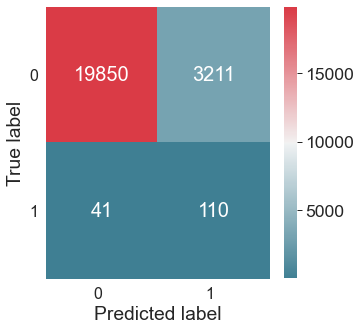

In [83]:
#Plot the confusion matrix for easier viewing

#Plot Attributes
fig = plt.figure(figsize= (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap - passing confusion matrix
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### 5.3.2) Key Performance Metrics

In [84]:
#Defining a function to get Key metrics

def get_metrics(target,predicted,predicted_prob):
    accuracy = round(metrics.accuracy_score(target,predicted)*100,2)
    error = round(100 - accuracy,2)
    precision = metrics.precision_recall_fscore_support(target,predicted)[0][1]
    recall = metrics.precision_recall_fscore_support(target,predicted)[1][1]
    f1 = metrics.precision_recall_fscore_support(target,predicted)[2][1]
    auc = metrics.roc_auc_score(target,predicted_prob)
    classification_report = metrics.classification_report(target,predicted, digits = 4)
    
    
    print(f'''Accuracy: {accuracy}% 
Error: {error}%
''')
    
    print("Classification Report")
    
    print(classification_report)
    
    print(f'AUC: {round(auc,2)}')
    
    return accuracy, precision, recall, f1, auc

In [85]:
#Get the Probabilities
predict_proba_1 = df_results["Predicted_Prob_1"]

In [86]:
logreg_metrics = get_metrics(y_test,y_pred,predict_proba_1)

Accuracy: 85.99% 
Error: 14.01%

Classification Report
              precision    recall  f1-score   support

           0     0.9979    0.8608    0.9243     23061
           1     0.0331    0.7285    0.0634       151

    accuracy                         0.8599     23212
   macro avg     0.5155    0.7946    0.4938     23212
weighted avg     0.9917    0.8599    0.9187     23212

AUC: 0.87


In [87]:
y_test

49952    0
42044    0
34880    0
45390    0
77462    0
        ..
39945    0
71092    0
69112    0
6409     0
43047    0
Name: BK, Length: 23212, dtype: int64

In [88]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 5.4) Setting a Different Threshold

In [89]:
#Setting a different threshold for the Regression
threshold = .45

y_pred_2 = (y_prob_df[1] >= threshold).astype(int)

y_pred_2

df_results["Predicted_Class_New"] = y_pred_2
df_results.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,Predicted_Prob_0,Predicted_Prob_1,Actual_Class,Predicted_Class,Predicted_Class_New
49952,1.2400,0.0300,0.1500,0.0600,0.5600,0.6600,0.0900,0.0800,49.8800,0.4120,0.5725,-0.0814,0.8158,0.1842,0,0,0
42044,0.6700,0.1500,0.1100,0.3300,0.0000,0.7600,0.4400,0.1800,28.7700,3.7753,79.5067,0.3333,0.8515,0.1485,0,0,0
34880,4.8000,-0.0200,0.3800,0.0800,0.6600,2.4600,0.0300,0.1300,67.8300,0.0923,0.0522,-0.4571,0.8194,0.1806,0,0,0
45390,2.2100,0.1300,0.2100,0.0700,0.8000,0.4100,0.1800,0.0400,98.1400,0.5620,0.4752,0.5135,0.8731,0.1269,0,0,0
77462,-2.1400,0.1500,0.2000,-0.0200,0.6200,1.1300,-0.0200,-0.4300,19.7700,-0.1177,-0.1432,-0.1359,0.2780,0.7220,0,1,1


In [90]:
#Check performance metrics
accuracy2 = round(metrics.accuracy_score(y_test,y_pred_2)*100,2)
error2 = round(100 - accuracy2,2)
print(f'''Accuracy: {accuracy2}% 
Error: {error2}%''')

Accuracy: 84.19% 
Error: 15.81%


In [91]:
#Get the Confusion Matrix
cm2 = metrics.confusion_matrix(y_test, y_pred_2, labels=labels)

#Put in DataFrame
cm_df2 = pd.DataFrame(cm2, index=labels, columns=labels)

#View the DataFrame
cm_df2

,0,1
0,19425,3636
1,33,118


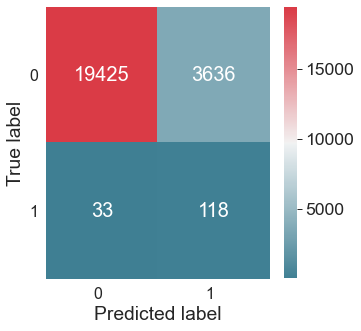

In [92]:
#Plot the confusion matrix for easier viewing

#Plot Attributes
fig = plt.figure(figsize= (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap - passing confusion matrix
heatmap = sns.heatmap(cm_df2,annot=True,annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [93]:
logreg2_metrics = get_metrics(y_test,y_pred_2,predict_proba_1)

Accuracy: 84.19% 
Error: 15.81%

Classification Report
              precision    recall  f1-score   support

           0     0.9983    0.8423    0.9137     23061
           1     0.0314    0.7815    0.0604       151

    accuracy                         0.8419     23212
   macro avg     0.5149    0.8119    0.4871     23212
weighted avg     0.9920    0.8419    0.9082     23212

AUC: 0.87


----------------------

## 6) Random Forest

### 6.1) Train the Model

In [94]:
#Instantiate the Algorithm
rf_model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=21)

In [95]:
#Train the model
rf_model.fit(x_train_scaled,y_resampled)

RandomForestClassifier(n_estimators=10, random_state=21)

### 6.2) Predicting on Test Set

In [96]:
#Predicting on Test Set
y_pred_rf = rf_model.predict(x_test_scaled)

In [97]:
#Predict probabilities using the "predict_proba" function
y_prob_rf = rf_model.predict_proba(x_test_scaled)

In [98]:
#Check the shape, there should be two columns, one for each class
y_prob_rf.shape

(23212, 2)

In [99]:
#Create a DataFrame
y_prob_df_rf = pd.DataFrame(y_prob_rf, index=y_test.index)

y_prob_df_rf.head(3)

,0,1
49952,0.9000,0.1000
42044,1.0000,0.0000
34880,1.0000,0.0000


### 6.3) Check Model Performance

#### 6.3.1) Confusion Matrix

In [100]:
#Get the Confusion Matrix
cm_rf = metrics.confusion_matrix(y_test, y_pred_rf, labels=labels)

#Put in DataFrame
cm_rf_df = pd.DataFrame(cm_rf, index=labels, columns=labels)

#View the DataFrame
cm_rf_df

,0,1
0,22817,244
1,122,29


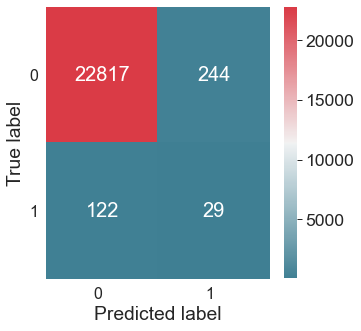

In [101]:
#Plot the confusion matrix for easier viewing

#Plot Attributes
fig = plt.figure(figsize= (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap - passing confusion matrix
heatmap = sns.heatmap(cm_rf_df,annot=True,annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### 6.3.2) Key Performance Metrics

In [102]:
rf_metrics = get_metrics(y_test,y_pred_rf,y_prob_df_rf[1])

Accuracy: 98.42% 
Error: 1.58%

Classification Report
              precision    recall  f1-score   support

           0     0.9947    0.9894    0.9920     23061
           1     0.1062    0.1921    0.1368       151

    accuracy                         0.9842     23212
   macro avg     0.5505    0.5907    0.5644     23212
weighted avg     0.9889    0.9842    0.9865     23212

AUC: 0.79


----------------------

## 7) Naive Bayes

### 7.1) Train the Model

In [103]:
#Instantiate the Algorithm 
gnb = GaussianNB()

In [104]:
#Train the model
gnb.fit(x_train_scaled,y_resampled)

GaussianNB()

### 7.2) Predicting on Test Set

In [105]:
y_pred_gnb = gnb.predict(x_test_scaled)

In [106]:
y_pred_gnb

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [107]:
#Predict probabilities using the "predict_proba" function
y_prob_gnb = gnb.predict_proba(x_test_scaled)

In [108]:
#Check the shape, there should be two columns, one for each class
y_prob_gnb.shape

(23212, 2)

In [109]:
#Create a DataFrame
y_prob_df_gnb = pd.DataFrame(y_prob_gnb, index=y_test.index)

y_prob_df_gnb.head(3)

,0,1
49952,0.9919,0.0081
42044,0.9973,0.0027
34880,1.0000,0.0000


### 7.3) Check Model Performance

#### 7.3.1) Confusion Matrix

In [110]:
#Get the Confusion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb, labels=labels)

#Put in DataFrame
cm_gnb_df = pd.DataFrame(cm_gnb, index=labels, columns=labels)

#View the DataFrame
cm_gnb_df

,0,1
0,19019,4042
1,34,117


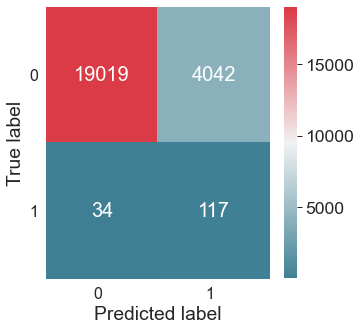

In [111]:
#Plot the confusion matrix for easier viewing

#Plot Attributes
fig = plt.figure(figsize= (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap - passing confusion matrix
heatmap = sns.heatmap(cm_gnb_df,annot=True,annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### 7.3.2) Key Metrics

In [112]:
gnb_metrics = get_metrics(y_test,y_pred_gnb,y_prob_df_gnb[1])

Accuracy: 82.44% 
Error: 17.56%

Classification Report
              precision    recall  f1-score   support

           0     0.9982    0.8247    0.9032     23061
           1     0.0281    0.7748    0.0543       151

    accuracy                         0.8244     23212
   macro avg     0.5132    0.7998    0.4788     23212
weighted avg     0.9919    0.8244    0.8977     23212

AUC: 0.86


----------------------

## 8) Support Vector Machines

### 8.1) Train the Model

In [113]:
#Instantiate the Algorithm 
svc = SVC(probability = True)

In [114]:
#Train the model
svc.fit(x_train_scaled,y_resampled)

SVC(probability=True)

### 8.2) Predicting on Test Set

In [115]:
y_pred_svc = svc.predict(x_test_scaled)

In [116]:
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
#Predict probabilities using the "predict_proba" function
y_prob_svc = svc.predict_proba(x_test_scaled)

In [118]:
#Check the shape, there should be two columns, one for each class
y_prob_svc.shape

(23212, 2)

In [119]:
#Create a DataFrame
y_prob_df_svc = pd.DataFrame(y_prob_svc, index=y_test.index)

y_prob_df_svc.head(3)

,0,1
49952,0.7971,0.2029
42044,0.9530,0.0470
34880,0.9857,0.0143


### 8.3) Check Model Performance

#### 8.3.1) Confusion Matrix

In [120]:
#Get the Confusion Matrix
cm_svc = metrics.confusion_matrix(y_test, y_pred_svc, labels=labels)

#Put in DataFrame
cm_svc_df = pd.DataFrame(cm_svc, index=labels, columns=labels)

#View the DataFrame
cm_svc_df

,0,1
0,20805,2256
1,39,112


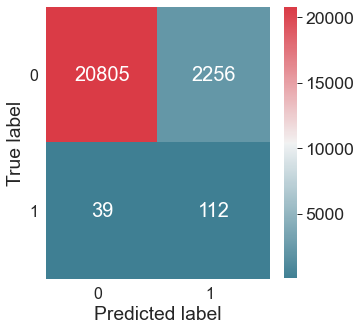

In [121]:
#Plot the confusion matrix for easier viewing

#Plot Attributes
fig = plt.figure(figsize= (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap - passing confusion matrix
heatmap = sns.heatmap(cm_svc_df,annot=True,annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### 7.3.2) Key Metrics

In [122]:
svc_metrics = get_metrics(y_test,y_pred_svc,y_prob_df_svc[1])

Accuracy: 90.11% 
Error: 9.89%

Classification Report
              precision    recall  f1-score   support

           0     0.9981    0.9022    0.9477     23061
           1     0.0473    0.7417    0.0889       151

    accuracy                         0.9011     23212
   macro avg     0.5227    0.8219    0.5183     23212
weighted avg     0.9919    0.9011    0.9421     23212

AUC: 0.89


----------------------

## 9) Voting Classifier

### 9.1) Train the Model

In [123]:
#Instantiate the Algorithm
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=21)),
        ('rf', RandomForestClassifier(random_state=21)),
        ('svc', SVC(probability = True, random_state=21))
    ]
)

In [ ]:
#Train the model
voting_clf.fit(x_train_scaled,y_resampled)

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(x_test_scaled, y_test))

### 9.2) Predicting on Test Set

In [ ]:
y_pred_votingclf = voting_clf.predict(x_test_scaled)

In [ ]:
#Predict probabilities using the "predict_proba" function
y_prob_votingclf = voting_clf.predict_proba(x_test_scaled)

In [ ]:
#Check the shape, there should be two columns, one for each class
y_prob_votingclf.shape

In [ ]:
#Create a DataFrame
y_prob_df_votingclf = pd.DataFrame(y_prob_votingclf, index=y_test.index)

y_prob_df_votingclf.head(3)

### 9.3) Check Model Performance

#### 9.3.1) Confusion Matrix

In [ ]:
#Get the Confusion Matrix
cm_votingclf = metrics.confusion_matrix(y_test, y_pred_votingclf, labels=labels)

#Put in DataFrame
cm_votingclf_df = pd.DataFrame(cm_votingclf, index=labels, columns=labels)

#View the DataFrame
cm_votingclf_df

In [ ]:
#Plot the confusion matrix for easier viewing

#Plot Attributes
fig = plt.figure(figsize= (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap - passing confusion matrix
heatmap = sns.heatmap(cm_votingclf_df,annot=True,annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### 9.3.2) Key Metrics

In [ ]:
votingclf_metrics = get_metrics(y_test,y_pred_votingclf,y_prob_df_votingclf[1])

----------------------

## 9) Model Selection

In [ ]:
#Create Dataframe for Performance Metrics of ALl Models
metric_labels = ("Accuracy (%)", "Precision","Recall", "F1 Score","AUC")
class_models = ("Logistic Regression","Random Forest","Naive Bayes", "Support Vector Machines","Voting Classifier")
metrics = (logreg_metrics,rf_metrics, gnb_metrics, svc_metrics, votingclf_metrics)

df_modelperf = pd.DataFrame(index = metric_labels)

In [ ]:
m = 0
for i in class_models:
    df_modelperf[i] = metrics[m]
    m += 1
    if m > len(metrics) - 1:
        break

In [ ]:
df_modelperf